In [1]:
#Ana Hoban (2609870004)
#collaborators: Amalia Karalis and Maude Larivière
#March 26th 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### important equations: $P = \rho c_s^2 = f_1c_s^2$
## The expressions we are evolving:

1. Mass conservation: $\partial_t \rho +\partial_x (\rho u_x)$ = 0
2. Momentum conservation: $\partial_t (\rho u_i) = \partial_j(\rho u_i u_j) - \partial_i P $
which has the following source term $\Delta(\rho u) = dt/dx \Delta P = \frac{dt}{dx} \frac{c_s^2}{\gamma}\Delta\rho$
3. Energy conservation: $\partial(\rho E) + \partial_x(\rho E u) = -\partial_x(\rho P u)$
which has the following pressure gradient term: $\Delta(\rho E) = \frac{dt}{dt}\Delta(Pu) = \frac{c_S^2}{\gamma}(u\Delta \rho + \rho \Delta u)$

In [60]:
# Set up the grid, time and grid spacing, and the sound speed squared
Ngrid = 100
Nsteps = 500
dt = 1e-2
dx = 2.0

g = 5/3 #gamma

x = np.arange(Ngrid) * dx # grid

#functions we are evolving
f1 = np.ones(Ngrid)   # rho (density)
f2 = np.zeros(Ngrid)  # rho*u (momentum density)
f3 = np.ones(Ngrid)   # rho*e_tot (energy density)

#other quantities
P = (f3 - 1/2 * f2**2/f1)*(g -1)/g #Pressure
cs2 = g*P/f1    #sound speed squared
u = np.zeros(Ngrid+1) # advective velocity (keep the 1st and last element zero)
M = (f2/f1)**2/np.sqrt(cs2) #Mach number

In [61]:
def advection(f, u, dt, dx):
    # calculating flux terms
    J = np.zeros(len(f)+1) # keeping the first and the last term zero
    J[1:-1] = np.where(u[1:-1] > 0, f[:-1] * u[1:-1], f[1:] * u[1:-1])
    f = f - (dt / dx) * (J[1:] - J[:-1]) #update

    return f

In [62]:
# Apply initial Gaussian perturbation
Amp, sigma = 5e3, Ngrid/10
f3 += Amp * np.exp(-(x - x.max()/2) ** 2 / sigma ** 2)

<IPython.core.display.Javascript object>


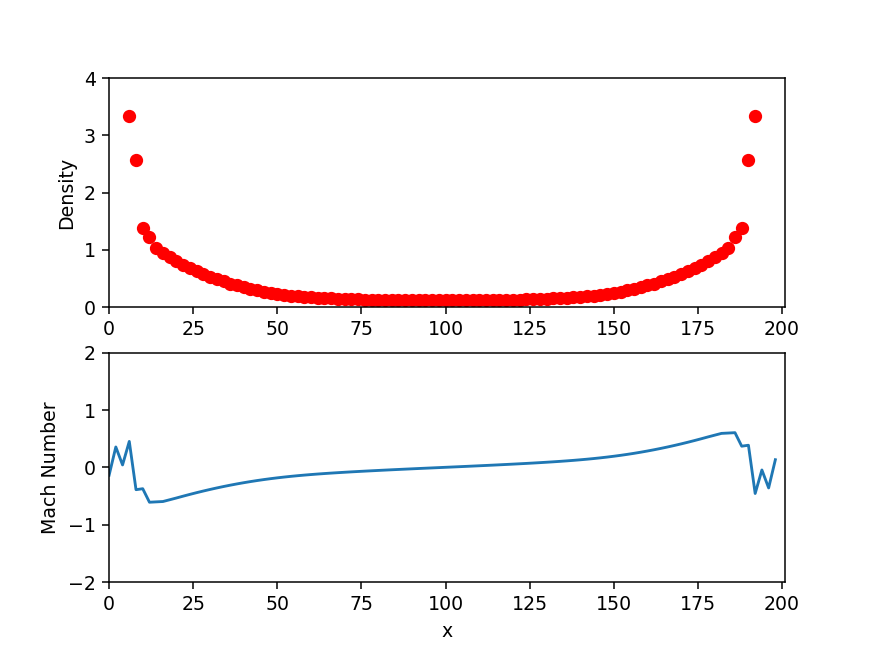

In [63]:
# plotting
plt.ion()
fig, ax = plt.subplots(2,1)

x1, = ax[0].plot(x, f1, 'ro') #panel 1: density
x2, = ax[1].plot(x, M)        #panel 2: Mach number

ax[0].set_xlim([0, dx*Ngrid+1])
ax[0].set_ylim([0, 4])
ax[1].set_xlim([0, dx*Ngrid+1])
ax[1].set_ylim([ -2, 2])


ax[1].set_xlabel('x')
ax[0].set_ylabel('Density')
ax[1].set_ylabel('Mach Number')
fig.canvas.draw()

for ct in range(Nsteps):
    # 1. advection velocity at the cell interface
    u[1:-1] = 0.5 * ((f2[:-1] / f1[:-1]) + (f2[1:] / f1[1:]))

    # 2. update density and momentum
    f1 = advection(f1, u, dt, dx)
    f2 = advection(f2, u, dt, dx)
    
    # 3. add the source term for f2 and apply pressure gradient force to f2
    P = (f3 - 1/2 * f2**2/f1)*(g -1)/g #Pressure
    cs2 = g*P/f1    #sound speed squared
    
    f2[1:-1] -= dt/dx * (P[2:] - P[:-2]) * 0.5
    
    f2[0]  -= 0.5 * (dt/dx) * (P[1] - P[0])
    f2[-1] -= 0.5 * (dt/dx) * (P[-1] - P[-2])
    
    
    # 4. update adv velocities
    u[1:-1] = 0.5 * ((f2[:-1] / f1[:-1]) + (f2[1:] / f1[1:]))
    
    # 5. advect energy (f3)
    f3 = advection(f3, u, dt, dx)
    
    # 6. update P and aff source term for f3
    P = (f3 - 1/2 * f2**2/f1)*(g -1)/g
    Pu = P*f2/f1 #p*u
    f3[1:-1] -= 0.5*dt/dx *(Pu[2:]-Pu[:-2])
    
    # 7. correct for source term at the boundary (reflective)
    f3[0]  -= 0.5 * dt/dx * (Pu[1] - Pu[0])
    f3[-1] -= 0.5 * dt/dx * (Pu[-1] - Pu[-2])
    
    #8 . update other quantities
    P = (f3 - 1/2 * f2**2/f1)*(g -1)/g #Pressure
    cs2 = g*P/f1    #sound speed squared
    M = (f2/f1)/np.sqrt(cs2) #Mach number

    # update the plot
    x1.set_ydata(f1)
    x2.set_ydata(M)
    fig.canvas.draw()
    plt.pause(0.001)

## Questions

# 1.
in class, we found that $\frac{\rho_1}{\rho_2}= 1/4$ in the strong shock limit

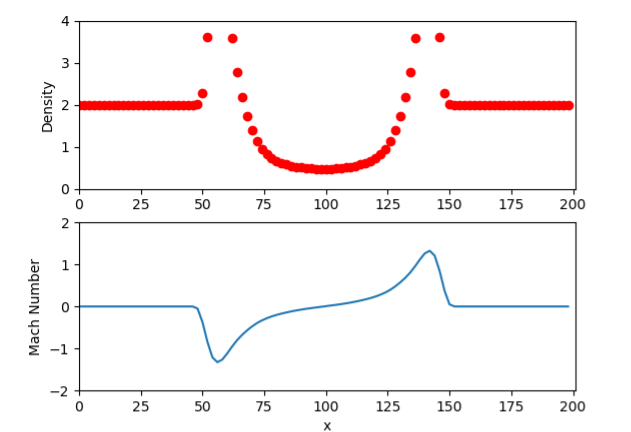

from the snapshot above, we can read $\rho_1 = 1$ and $\rho_2 \approx 4$ and so we find, as expected that $\frac{\rho_1}{\rho_2}= 1/4$



# 2.
I tried varying $\gamma$, the amplitude, the density, the energy density and momentum density initial conditions and still get the same width. I do not know why it is not changing the shock width as I would expect that changing fluid properties changes the perturbation properties as well.

1. Changing gamma, the energy density and momentum density

2. Changing the density changes only the baseline's position in y
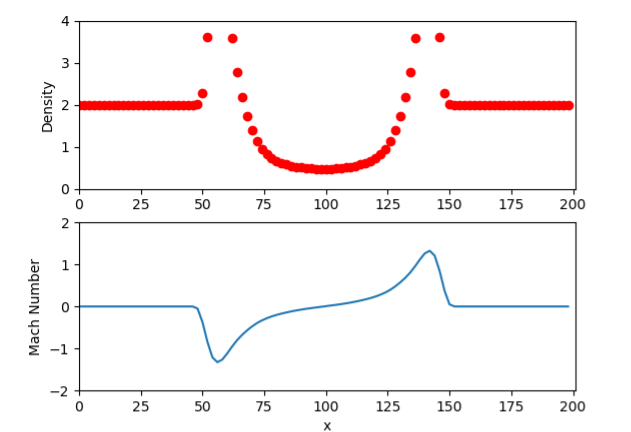

